# Differentiable Architecture Search

## Example

In [3]:
# Uncomment the following line when running on Google Colab
# !pip install autora[theorist-darts]

Let's generate a simple data set with two features $x_1, x_2 \in [0, 1]$ and a target $y$. We will use the following generative model:
$y = 2 x_1 - e^{(5 x_2)}$

In [4]:
import numpy as np

x_1 = np.linspace(0, 1, num=10)
x_2 = np.linspace(0, 1, num=10)
X = np.array(np.meshgrid(x_1, x_2)).T.reshape(-1,2)

y = 2 * X[:,0] + np.exp(5 * X[:,1])

Now let us define the search space, that is, the space of operations to consider when searching over the space of computation graphs.

In [5]:
primitives = [
    "none",
    "add",
    "subtract",
    'mult',
    "logistic",
    'exp',
    'relu',
]

## Set up the DARTS Regressor

We will use the DARTS Regressor to predict the outcomes. There are a number of parameters that determine how the architecture search is performed. The most important ones are listed below:

- **num_graph_nodes**: The number of latent variables used to represent the model.
- **arch_updates_per_epoch**: The number of architecture updates per training epoch. These updates affect the architecture weights $\alpha$ indicating the relative contribution of each operation for a given computation step.
- **arch_learning_rate_max**: The initial learning rate of the architecture weight optimizer.
- **param_updates_per_epoch**: The number of parameter updates per epoch. Once the architecture updates are complete, the parameters associated with each operation are updated.
- **param_momentum**: The momentum of the parameter optimizer.
- **max_epochs**: The maximum number of epochs to run DARTS.
- **output_type**: The type of output to produce. In our case, we treat the outcome as a real variable, i.e., "real".


Let's set up the DARTS regressor with some default parameters.


In [6]:
from autora.theorist.darts import DARTSRegressor

darts_estimator = DARTSRegressor(
    num_graph_nodes=1,
    arch_updates_per_epoch=1,
    arch_learning_rate_max=0.001,
    param_updates_per_epoch=500,
    param_momentum=0.9,
    max_epochs=300,
    output_type="real",
    primitives=primitives,
)

Now we have everything to run differentiable architecture search and visualize the model resulting from the highest architecture weights. Note that the current model corresponds to the model with the highest architecture weights.

  0%|          | 0/300 [00:00<?, ?it/s]

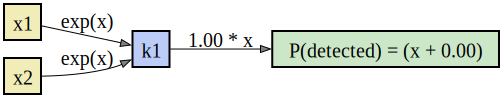

In [7]:
darts_estimator.fit(X, y)
darts_estimator.visualize_model()

We can refine the fit by running the `fit` method again, after changing the parameters. This allows us to keep the same architecture but refit the parameters in the final sampled model, for example:

0it [00:00, ?it/s]

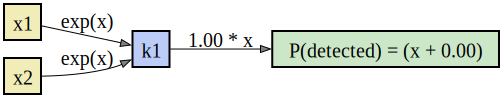

In [8]:
darts_estimator.set_params(
    max_epochs=0,  # no epochs of architecture fitting
    param_updates_for_sampled_model=1000,  # 1000 steps of param optimiziation
)
darts_estimator.fit(X, y)
darts_estimator.visualize_model()

We can also change how the model is sampled from the architecture weight distribution:

0it [00:00, ?it/s]

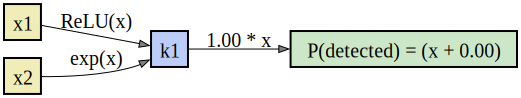

In [9]:
darts_estimator.set_params(
    max_epochs=0,  # no epochs of architecture fitting
    sampling_strategy="sample",  # overriding default "max"
    param_updates_for_sampled_model=800,
)
darts_estimator.fit(X, y)
darts_estimator.visualize_model()

To recover the initial model, we need to return the sampling strategy to the default `"max"`:

0it [00:00, ?it/s]

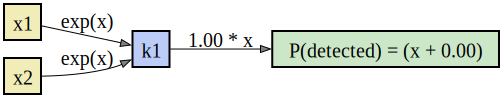

In [10]:
darts_estimator.set_params(
    max_epochs=0,  # no epochs of architecture fitting
    sampling_strategy="max",
    param_updates_for_sampled_model=1000,
)
darts_estimator.fit(X, y)
darts_estimator.visualize_model()

As long as the architecture has not been refitted in the meantime, the architecture should be identical to the initial result, as the `sampling_strategy="max"` is deterministic. The coefficients of the architecture functions may, however, be different, as they have different starting values compared to when they were initially set.
